In [1]:
%pylab inline
from pyndamics3 import Simulation

Populating the interactive namespace from numpy and matplotlib
pyndamics3  version  0.0.20


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/29728a7d4bebe8197dca7d873d81b9dce954522e">

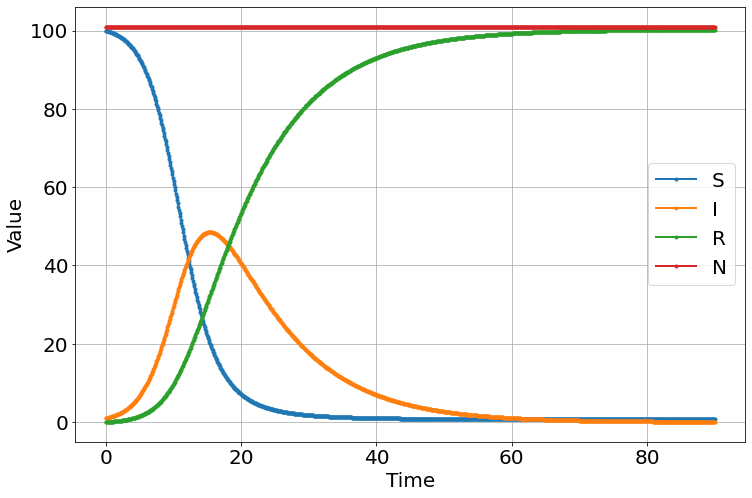

<Figure size 864x576 with 0 Axes>

In [2]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.params(β=.5,γ=.1)
sim.run(90)

In [3]:
t_data=[10,20,30,40,50]
I_data=[30,45,18,8,2]

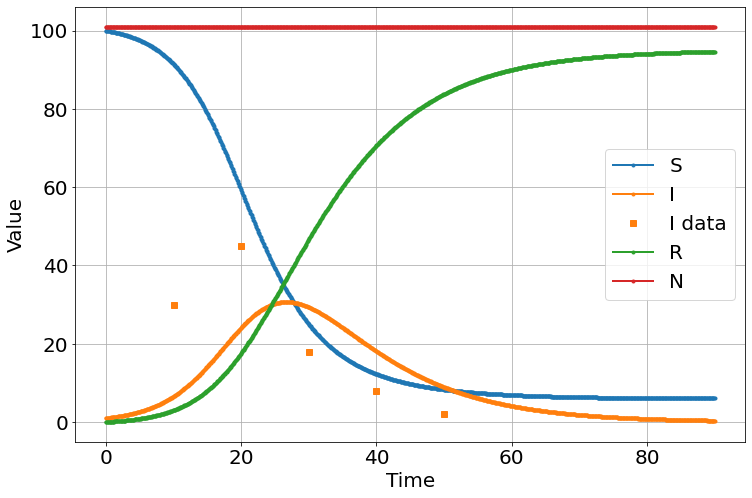

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.add_data(t=t_data,I=I_data,plot=1)
sim.params(β=.3,γ=.1)
sim.run(90)

In [5]:
from pyndamics3.mcmc import *

In [6]:
model=MCMCModel(sim,
               β=Uniform(0,2),
               γ=Uniform(0,2),)

Sampling Prior...
Done.
0.33 s
Running MCMC 1/4...
Done.
1 m, 23.69 s
Running MCMC 2/4...
Done.
1 m, 44.69 s
Running MCMC 3/4...
Done.
1 m, 47.34 s
Running MCMC 4/4...
Done.
1 m, 47.63 s


<Figure size 864x576 with 0 Axes>

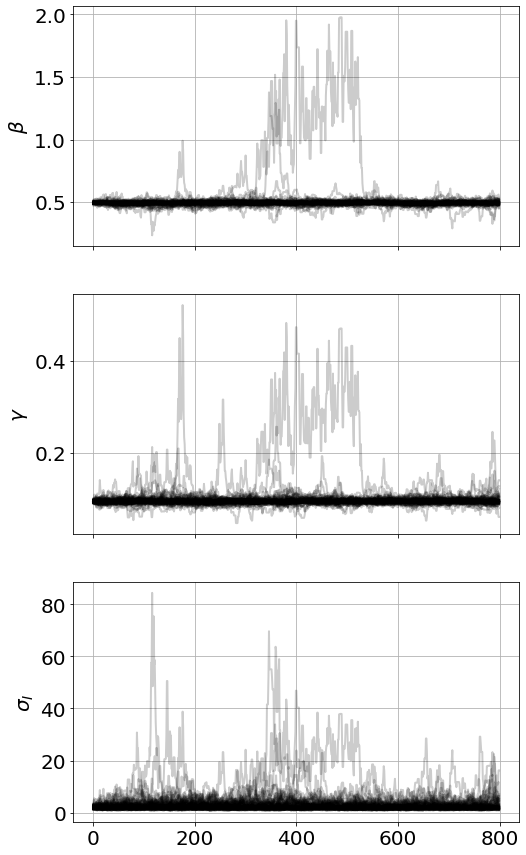

In [7]:
model.run_mcmc(800,repeat=4)
model.plot_chains()

In [86]:
def dicttable(D):
    buf=[]
    add=buf.append
    add('<table>')
 
    for key in D:
        add('<tr><td><b>%s</b></td><td>%s</td></tr>' % (key,D[key]))
        
    add('</table>')
    return '\n'.join(buf) 

In [124]:
def summary(self):
    from IPython.display import HTML
    buf=[]
    add=buf.append
    
    def tds(L):
        return ' '.join([f'<td>{s}</td>' for s in L])
    def b(s):
        s=str(s)
        return f"<b>{s}</b"
    
    add('<h1>Priors</h1>')
    add('<table>')
    
    row=[]
    td=row.append
    
    td(b("name"))
    td(b("prior"))
    td(b(" "))
    
    add('<tr>%s</tr>' % (tds(row)))
    for p in self.params:
        typestr=str(type(self.params[p])).split("'")[1].replace('pyndamics3.mcmc.','')
        
        row=[]
        td=row.append
        
        td(b(p))
        td(typestr)
    
        if typestr=='Uniform':
            td(dicttable(
                {'min':self.params[p].min,
                 'max':self.params[p].max}))
        else:
            td(dicttable({}))
               
        add('<tr>%s</tr>' % (tds(row)))
    
    add('</table>')
    
    add('<h1>Fit Statistics</h1>')
        
    N=sum([len(c.data['value']) for c in model.sim.components if c.data])
    fit_stats={'data points':N,
               'variables':len(model.params),
               'number of walkers':model.nwalkers,
               'number of samples':model.samples.shape[0],
              'Bayesian info crit. (BIC)':model.BIC}
    add(dicttable(fit_stats))
    
        
    
    add('<h1>Posteriors</h1>')
    add('<table>')
    
    row=[]
    td=row.append
    
    td(b("name"))
    td(b("value"))
    td(b("2.5%"))
    td(b("97.5%"))
    
    add('<tr>%s</tr>' % (tds(row)))
    
    pp=self.percentiles([0.025,50,97.5])
    for p in self.params:
        typestr=str(type(self.params[p])).split("'")[1].replace('pyndamics3.mcmc.','')
        
        row=[]
        td=row.append
        
        td(b(p))
        td(f'{pp[p][1]:.5g}')
        td(f'{pp[p][0]:.5g}')
        td(f'{pp[p][2]:.5g}')

        add('<tr>%s</tr>' % (tds(row)))
    
    add('</table>')
        
    
    
    
    #return HTML('\n'.join(buf))
    return '\n'.join(buf)

In [112]:
sum([len(c.data['value']) for c in model.sim.components if c.data])

5

In [121]:
model.samples.shape

(60000, 3)

In [125]:
HTML(summary(model))

In [106]:
c=model.params['_sigma_I']

In [68]:
c=Normal(5,2)

In [38]:
c.

"<class 'pyndamics3.mcmc.Uniform'>"

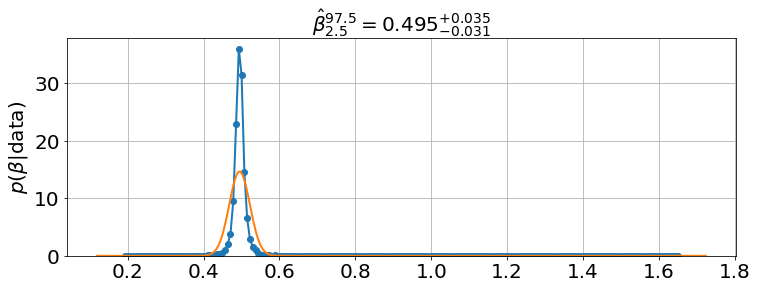

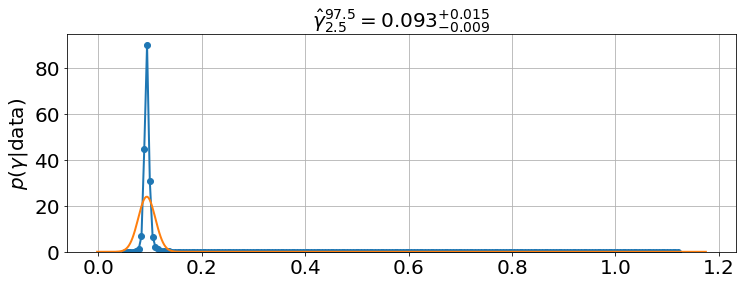

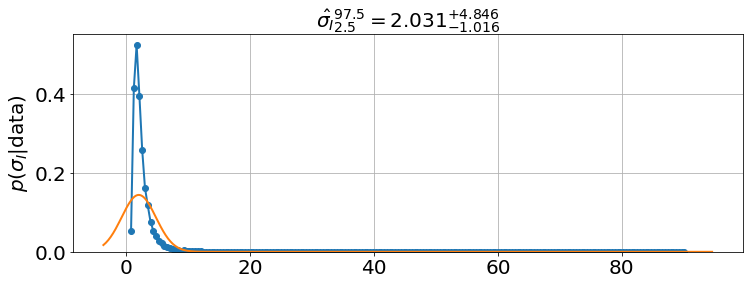

In [19]:
model.plot_distributions()

In [20]:
best_estimates=model.best_estimates()
best_estimates

{'β': array([0.48362688, 0.49485825, 0.5063108 ]),
 'γ': array([0.08960343, 0.09347326, 0.09801114]),
 '_sigma_I': array([1.36552538, 2.03100032, 3.47133768])}

In [21]:
best_estimates['β'][1]  # median

0.4948582476563234

In [22]:
best_estimates['β'][0]  # 2.5% level

0.4836268804089593